In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from load_data import load_data

In [2]:
data = load_data("bianconi-barabasi_10000_5")

Loading dataset: Completed!


In [3]:
def offset_at_peak(df):
    all_series = {col : df[col] for col in df}
    for _,series in all_series.items():
        series.index = series.index - series.index[np.argmax(series)]
    return pd.DataFrame.from_dict(all_series)

In [4]:
data

run                                    0                           1        \
compartment                             S    E    I    R    D       S    E   
reaction fear     feedback t                                                 
none     none     none     0.000   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.125   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.250   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.375   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
                           0.500   9999.0  0.0  1.0  0.0  0.0  9999.0  0.0   
...                                   ...  ...  ...  ...  ...     ...  ...   
cut      anticorr all      89.875     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.000     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.125     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.250     NaN  NaN  NaN  NaN  NaN     NaN  NaN   
                           90.375     NaN  NaN  NaN  NaN  NaN     NaN  NaN   

run                                               ...      98                 \
compartment                          I    R    D  ...       S    E    I    R   
reaction fear     feedback t                      ...                          
none     none     none     0.000   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.125   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.250   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.375   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
                           0.500   1.0  0.0  0.0  ...  9999.0  0.0  1.0  0.0   
...                                ...  ...  ...  ...     ...  ...  ...  ...   
cut      anticorr all      89.875  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.000  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.125  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.250  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   
                           90.375  NaN  NaN  NaN  ...     NaN  NaN  NaN  NaN   

run                                         99                      
compartment                          D       S    E    I    R    D  
reaction fear     feedback t                                        
none     none     none     0.000   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.125   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.250   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.375   0.0  9999.0  0.0  1.0  0.0  0.0  
                           0.500   0.0  9999.0  0.0  1.0  0.0  0.0  
...                                ...     ...  ...  ...  ...  ...  
cut      anticorr all      89.875  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.000  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.125  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.250  NaN     NaN  NaN  NaN  NaN  NaN  
                           90.375  NaN     NaN  NaN  NaN  NaN  NaN  

[66363 rows x 500 columns]

In [8]:
pd.unique(data.reset_index(["reaction","t"]).index)

array([('none', 'none'), ('fixed', 'short'), ('fixed', 'long'),
       ('fixed', 'shortlong'), ('fixed', 'neighbours'), ('fixed', 'all'),
       ('uni', 'short'), ('uni', 'long'), ('uni', 'shortlong'),
       ('uni', 'neighbours'), ('uni', 'all'), ('asyLow', 'short'),
       ('asyLow', 'long'), ('asyLow', 'shortlong'),
       ('asyLow', 'neighbours'), ('asyLow', 'all'), ('asyHigh', 'short'),
       ('asyHigh', 'long'), ('asyHigh', 'shortlong'),
       ('asyHigh', 'neighbours'), ('asyHigh', 'all'), ('bi', 'short'),
       ('bi', 'long'), ('bi', 'shortlong'), ('bi', 'neighbours'),
       ('bi', 'all'), ('corr', 'short'), ('corr', 'long'),
       ('corr', 'shortlong'), ('corr', 'neighbours'), ('corr', 'all'),
       ('anticorr', 'short'), ('anticorr', 'long'),
       ('anticorr', 'shortlong'), ('anticorr', 'neighbours'),
       ('anticorr', 'all')], dtype=object)

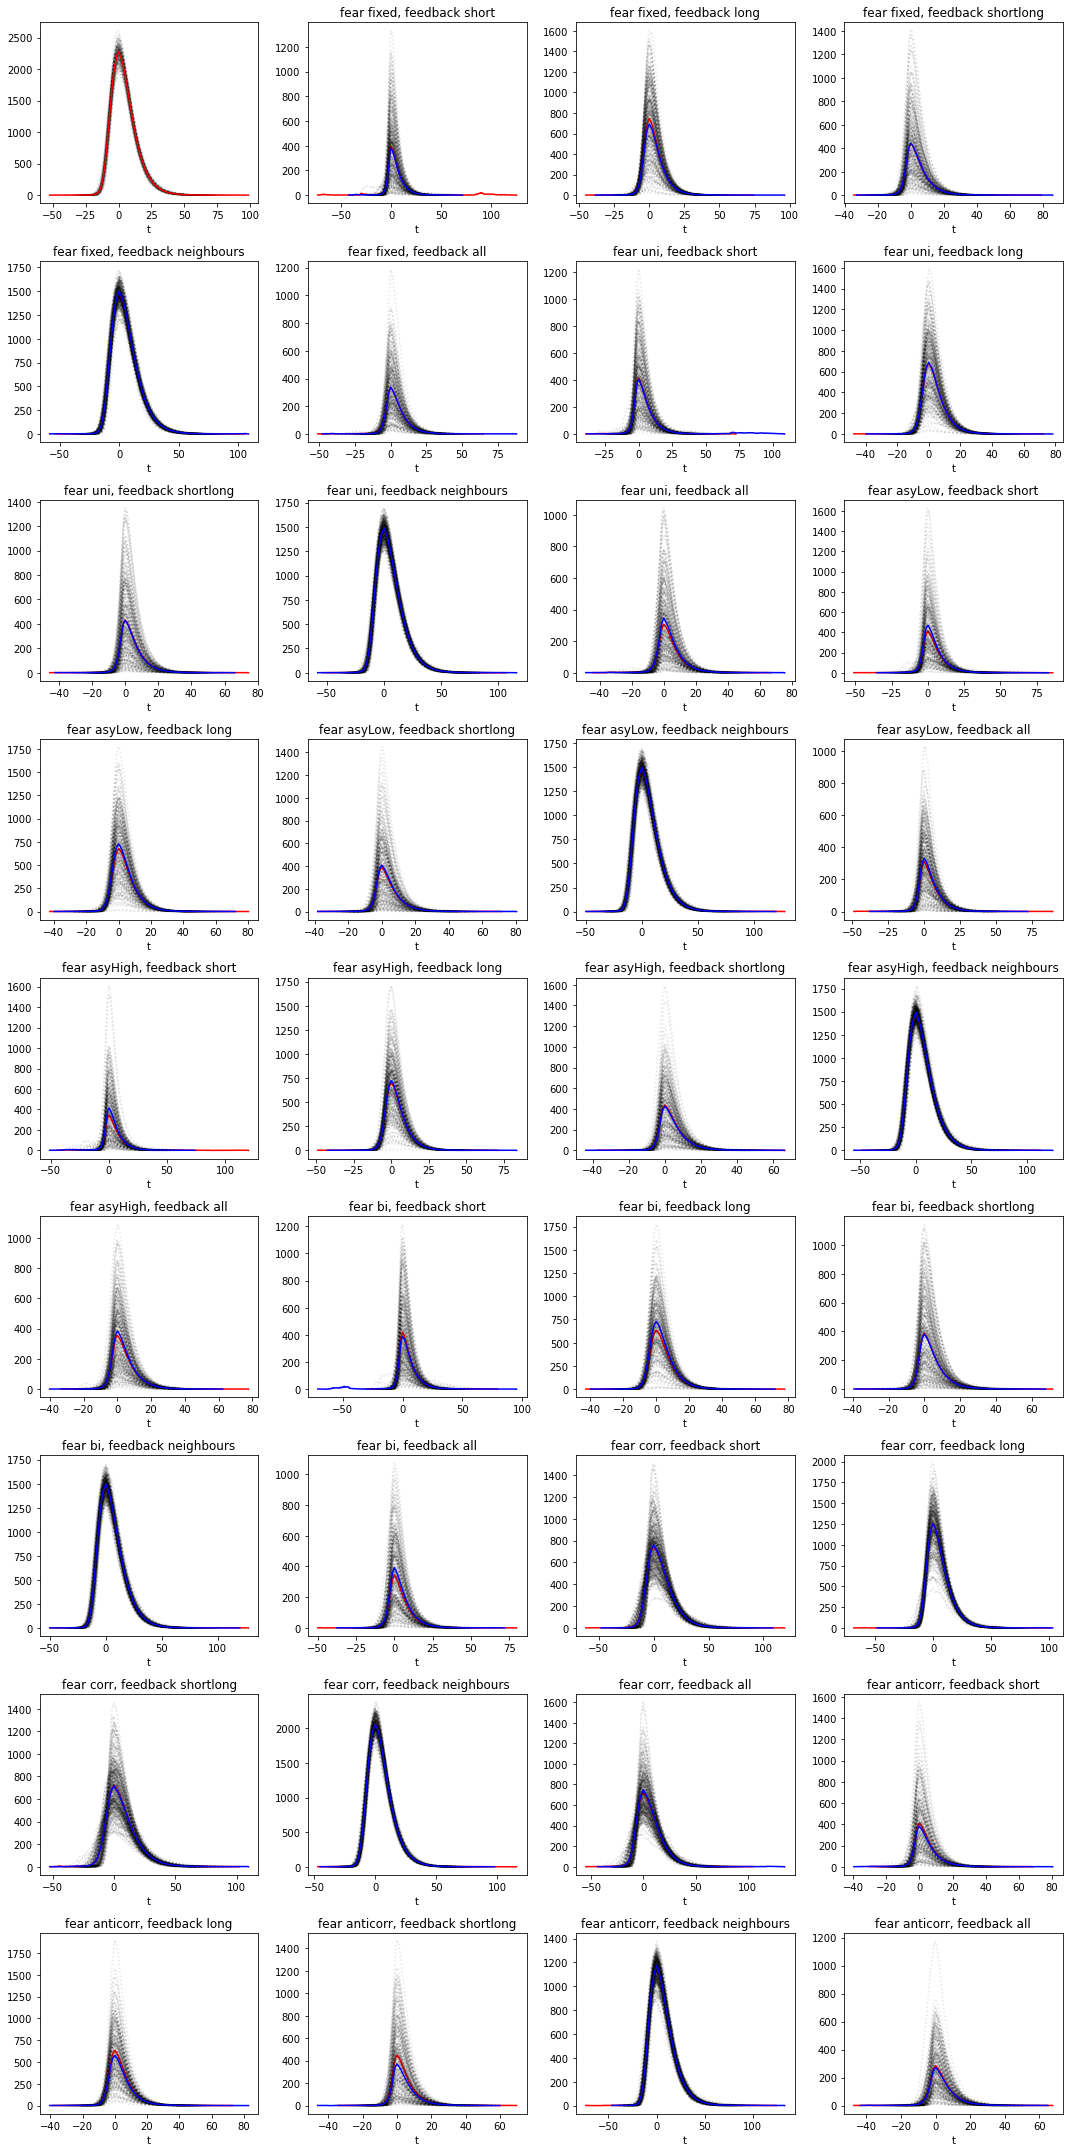

In [10]:
fig, axs = plt.subplots(9, 4, figsize=(15,30))
axs = axs.flatten()

i = 0
traslated = offset_at_peak(data.xs(("none","none","none"), level=(0,1,2)).xs("I", axis=1, level=1))
traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
traslated.mean(axis=1).plot(color="r", ax=axs[i])
i = 1
for hyper_pars in pd.unique(data.reset_index(["reaction","t"]).index):
    if hyper_pars[0] == "none":
        continue
    axs[i].set_title(f"fear {hyper_pars[0]}, feedback {hyper_pars[1]}")
    traslated = offset_at_peak(data.xs("soften", level=0).xs(hyper_pars, level=(0,1)).xs("I", axis=1, level=1))
    traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    traslated.mean(axis=1).plot(color="r", label="soften", ax=axs[i])
    traslated = offset_at_peak(data.xs("cut", level=0).xs(hyper_pars, level=(0,1)).xs("I", axis=1, level=1))
    traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    traslated.mean(axis=1).plot(color="b", label="cut", ax=axs[i])
    i = i + 1
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


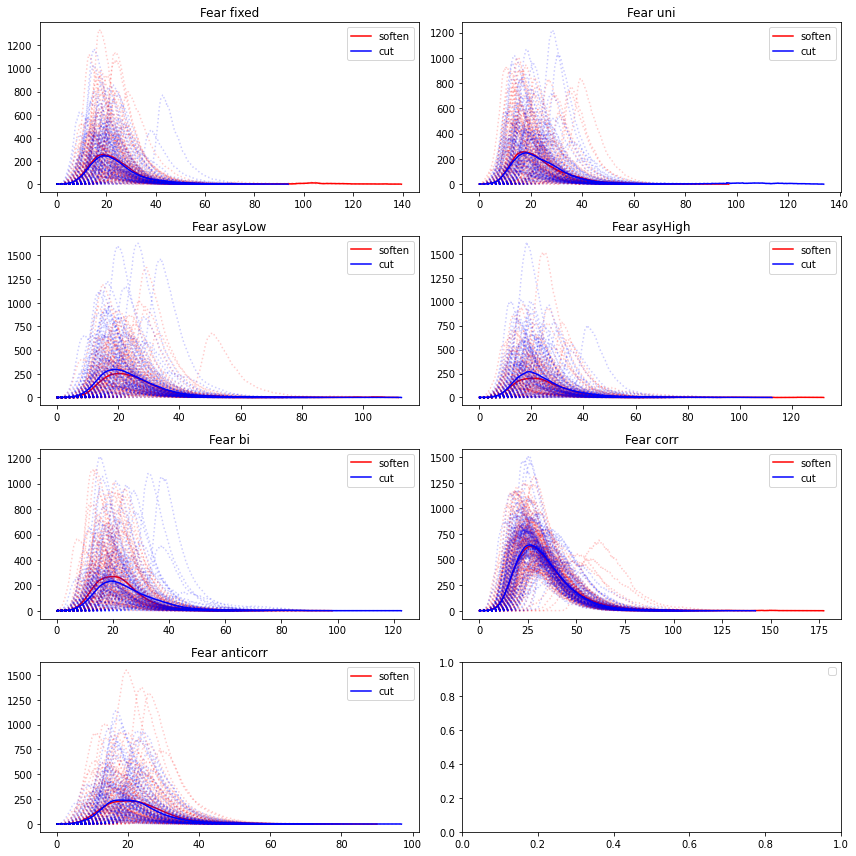

In [34]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
axs = axs.flatten()
mycolors = ["r","b"]

i = 0
for fear in pd.unique(data.index.get_level_values(1)):
    axs[i].set_title(f"Fear {fear}")
    if fear == "none":
        continue
    for j,reaction in enumerate(["soften","cut"]):
        sliced = data.xs((reaction,fear,"short"), level=(0,1,2)).xs("I", axis=1, level=1)
        axs[i].plot(sliced.mean(axis=1), color=mycolors[j], label=reaction)
        for col in sliced:
            axs[i].plot(sliced[col], color=mycolors[j], linestyle=":", alpha=0.2)
    i = i + 1

for ax in axs:
    ax.legend()
fig.tight_layout()

In [17]:
sliced.mean(axis=1)

t
0.000      1.00
0.125      1.00
0.250      1.02
0.375      1.03
0.500      1.02
           ... 
136.250    1.00
136.375    1.00
136.500    1.00
136.625    1.00
136.750    0.00
Length: 1095, dtype: float64

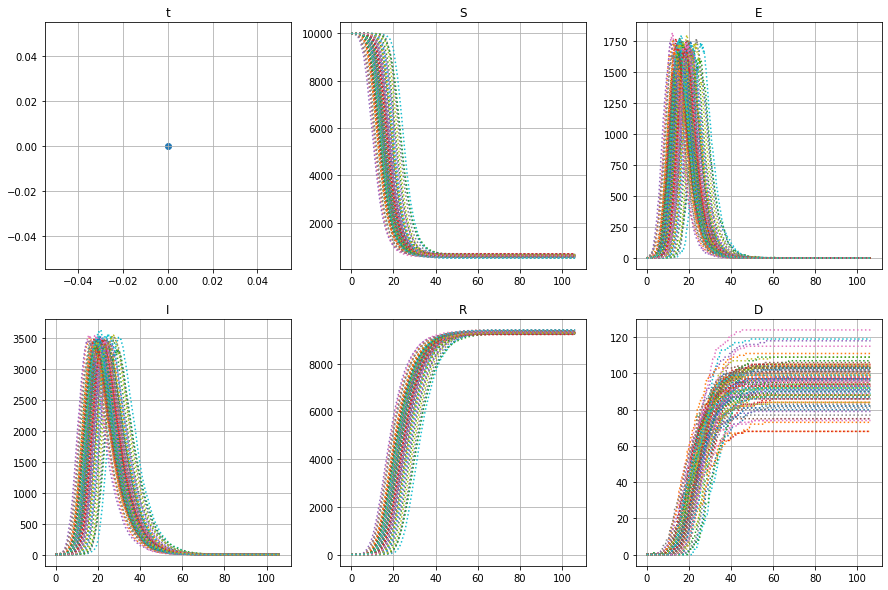

In [5]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i in range(len(file_list)):
    axs[1].plot(data["S"][i], linestyle=":")
    axs[2].plot(data["E"][i], linestyle=":")
    axs[3].plot(data["I"][i], linestyle=":")
    axs[4].plot(data["R"][i], linestyle=":")
    axs[5].plot(data["D"][i], linestyle=":")

axs[0].scatter(0,0)
axs[0].set_title("t")

axs[1].set_title("S")
    
axs[2].set_title("E")
    
axs[3].set_title("I")
    
axs[4].set_title("R")
    
axs[5].set_title("D")
for ax in axs:
    ax.grid()

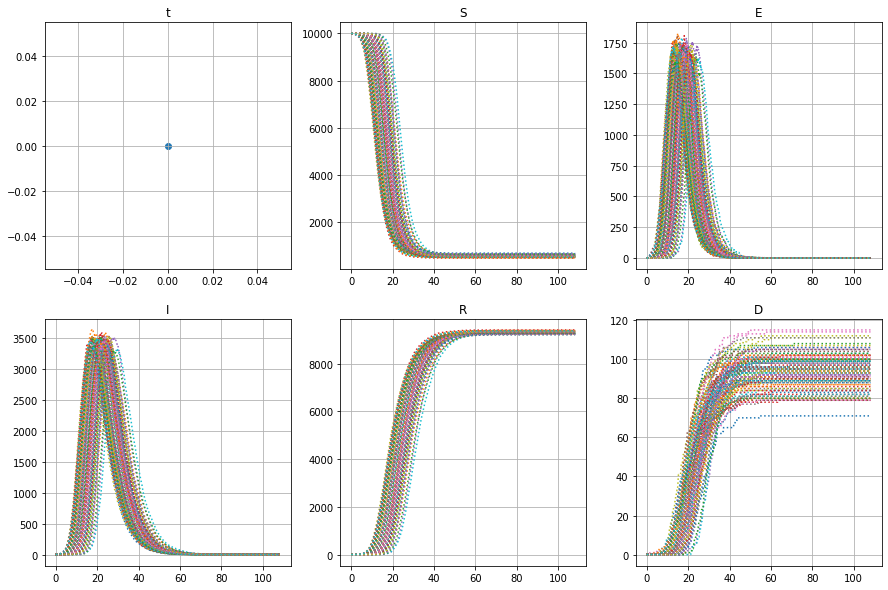

In [10]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i in range(len(file_list)):
    axs[1].plot(data["S"][i], linestyle=":")
    axs[2].plot(data["E"][i], linestyle=":")
    axs[3].plot(data["I"][i], linestyle=":")
    axs[4].plot(data["R"][i], linestyle=":")
    axs[5].plot(data["D"][i], linestyle=":")

axs[0].scatter(0,0)
axs[0].set_title("t")

axs[1].set_title("S")
    
axs[2].set_title("E")
    
axs[3].set_title("I")
    
axs[4].set_title("R")
    
axs[5].set_title("D")
for ax in axs:
    ax.grid()